# 1D Chain Model

In this notebook, we begin to investigate the Anderson model through the simulation of the d= 1
 case.

In [1]:
# Init a 1D chain of atoms:
import numpy as np

n = 80
chain = np.zeros((n, 1))

In [44]:
#chain: physical model
# epsilon is the control parameter for randomness
# T controls the hopping
def _hamiltonian(chain, epsilon, t):
    H = epsilon * np.identity(len(chain))
    H -= t * (np.roll(np.identity(len(chain)), 1, axis=0) + np.roll(np.identity(len(chain)), -1, axis=0))
    return H



The Hamiltonian is given by:

$$\hat{H} = \epsilon_0 \delta_{n, m} - t (\delta_{n+1, m} + \delta_{n-1, m})$$

In [45]:
H = _hamiltonian(chain, 0, 1)

In [46]:
# Found the eigenvalues and eigenvectors of the Hamiltonian (energies, and energy eigenstates)
np.linalg.eigh(H)

EighResult(eigenvalues=array([-2.00000000e+00, -1.99383467e+00, -1.99383467e+00, -1.97537668e+00,
       -1.97537668e+00, -1.94473984e+00, -1.94473984e+00, -1.90211303e+00,
       -1.90211303e+00, -1.84775907e+00, -1.84775907e+00, -1.78201305e+00,
       -1.78201305e+00, -1.70528033e+00, -1.70528033e+00, -1.61803399e+00,
       -1.61803399e+00, -1.52081193e+00, -1.52081193e+00, -1.41421356e+00,
       -1.41421356e+00, -1.29889610e+00, -1.29889610e+00, -1.17557050e+00,
       -1.17557050e+00, -1.04499713e+00, -1.04499713e+00, -9.07980999e-01,
       -9.07980999e-01, -7.65366865e-01, -7.65366865e-01, -6.18033989e-01,
       -6.18033989e-01, -4.66890728e-01, -4.66890728e-01, -3.12868930e-01,
       -3.12868930e-01, -1.56918191e-01, -1.56918191e-01, -4.95560432e-16,
       -2.55140025e-16,  1.56918191e-01,  1.56918191e-01,  3.12868930e-01,
        3.12868930e-01,  4.66890728e-01,  4.66890728e-01,  6.18033989e-01,
        6.18033989e-01,  7.65366865e-01,  7.65366865e-01,  9.07980999e-01,
  

In [47]:
# Assume that the initial state is the ground state.
from scipy.linalg import expm
def __time_evolution(H, t):
    return expm(-1j * H * t)

psi_0 = np.zeros(n)
psi_0[n//2] = 1

In [48]:
end_time = 10
history = []
for step in range(end_time):
    psi_t = __time_evolution(H, step) @ psi_0
    history.append(psi_t)

0.9999999999999998

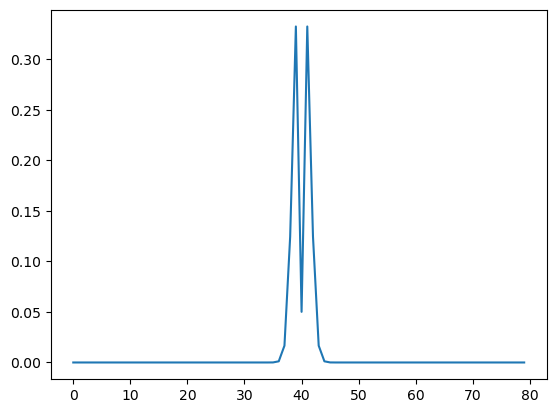

In [49]:
import matplotlib.pyplot as plt

#plt.plot(history[1].T.conj() @ history[1])
density = np.real(np.multiply(history[1].conj(), history[1]))
plt.plot(density)
sum(density)
#for wavefunction in history:
#    plt.plot(np.linalg.norm(wavefunction))

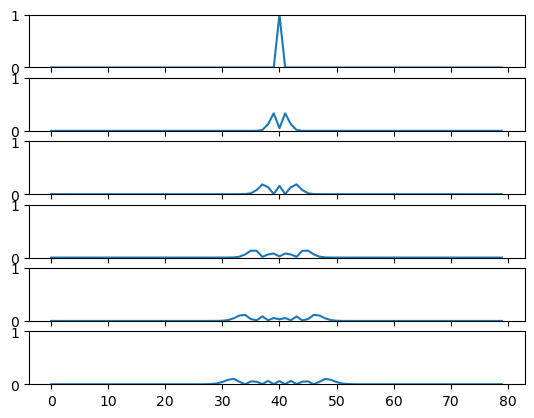

In [50]:
fig, axs = plt.subplots(6)
for i, ax in enumerate(axs):
    density = np.real(np.multiply(history[i].conj(), history[i]))
    ax.plot(density)
    ax.set_ylim(0, 1)
    sum(density)



Standard method

Given a complete eigenbasis $| E_i \rangle$ of H, we can expand a state in terms of this eigenbasis:

$$| \psi \rangle = \left(\sum_i \langle E_i | \exp\left(\frac{-i E_i t }{\hbar}\right)\right) | \psi \rangle = \sum_i \langle E_i | \psi \rangle \exp\left(\frac{-i E_i t }{\hbar}\right)$$


In [99]:
from scipy.linalg import expm

class AndersonChain:
    '''
    Construct and simulate a 1D Anderson lattice with periodic boundary conditions.
    We represent all wave functions and operators in the lattice site basis. 

    Attributes
        chain (1D ndarray): 
        psi0 (1D ndarray): 
        eps_range (array-like):
        t_hop (float):
        story_history (boolean):
    '''
    def __init__(self, num_sites, psi0, eps_range, t_hop, store_history=True):
        self.chain = np.zeros((num_sites, 1))
        self.psi0 = psi0
        self.eps_range = eps_range
        self.t_hop = t_hop # hopping param

        if store_history:
            self.history = []

    def _hamiltonian(self):
        '''
        Construct the hamiltonian for the Anderson tight-binding model, a matrix representation in the occupancy site basis. 
        '''
        binding = np.diagflat(np.random.uniform(*self.eps_range, size=(len(self.chain, ))))
        
        hopping = self.t_hop * (np.roll(np.identity(len(self.chain)), 1, axis=0) + np.roll(np.identity(len(self.chain)), -1, axis=0))
        
        return binding + hopping
    
    
    def _time_evolution(self, time):
        '''
        Calculate the unitary time evolution operator for the given hamiltonian.

        Args
            time (float): time when time evolution operator is calculated

        Returns
            U(t) (ndarray of size num_sites x num_sites) 
        '''

        return expm(-1j * self._hamiltonian() * time)
    
    
    def solve(self, t, nt): #t_steps):
        '''
        Calculate psi(t). 

        Args
            t (array-like): time range of form (t_initial, t_final)
            nt (int): number of time steps
        '''        

        times = np.linspace(*t, nt)
        
        history = []

        for time in times:
            psi_t = self._time_evolution(time) @ psi_0
            history.append(psi_t) 
        
        return history
    

In [79]:
n = 80
chain = np.zeros((n, 1))
psi_0 = np.zeros(n)
psi_0[n//2] = 1

ring = AndersonChain(chain, psi_0, [1, 1], 1)

In [81]:
history = ring.solve(t_steps=10)

(80, 80) (80, 80)
(80, 80) (80, 80)
(80, 80) (80, 80)
(80, 80) (80, 80)
(80, 80) (80, 80)
(80, 80) (80, 80)
(80, 80) (80, 80)
(80, 80) (80, 80)
(80, 80) (80, 80)
(80, 80) (80, 80)


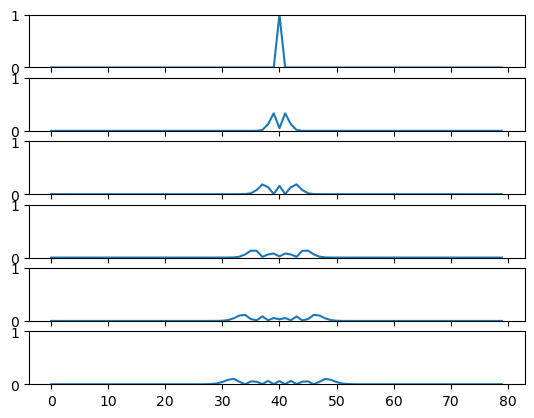

In [83]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(6)
for i, ax in enumerate(axs):
    density = np.real(np.multiply(history[i].conj(), history[i]))
    ax.plot(density)
    ax.set_ylim(0, 1)
    sum(density)

In [108]:
anderson_ring = AndersonChain(chain, psi_0, [-10, 10], 1)
#localized_hist = anderson_ring.solve(10)
localized_hist = anderson_ring.solve([0, 10], 100)

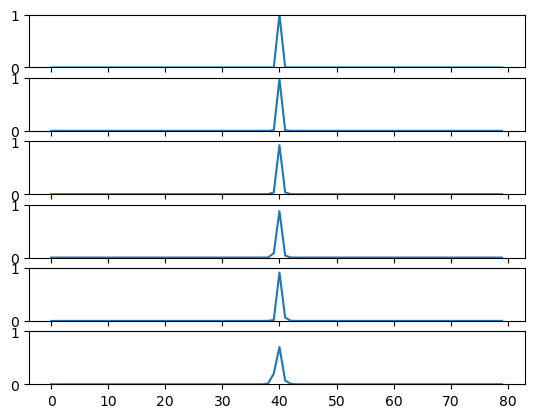

In [110]:
fig, axs = plt.subplots(6)
for i, ax in enumerate(axs):
    density = np.real(np.multiply(localized_hist[i].conj(), localized_hist[i]))
    ax.plot(density)
    ax.set_ylim(0, 1)
    sum(density)

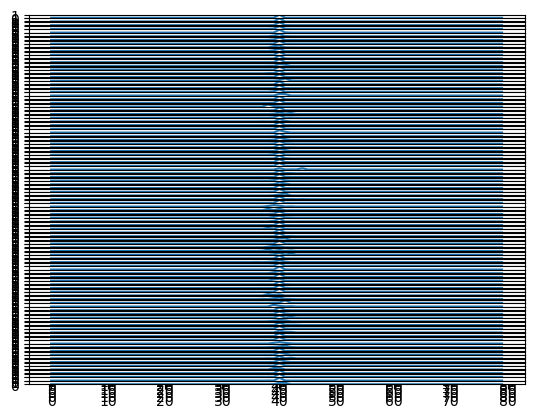

In [111]:
fig, axs = plt.subplots(len(localized_hist))
for i, ax in enumerate(axs):
    density = np.real(np.multiply(localized_hist[i].conj(), localized_hist[i]))
    ax.plot(density)
    ax.set_ylim(0, 1)
    sum(density)

In [8]:
bound = [-1, 1]
a = np.random.uniform(*bound, size=(6, ))

print(a)

np.diagflat(a).shape



[-0.56125123 -0.29692149 -0.39504361 -0.16313736 -0.7679611   0.08872229]


(6, 6)